# Comparing surface stress from ocean-only (uncoupled) and ocean-wave (coupled) model simulations for the Mediterranean Sea

In [1]:
import os.path
from glob import glob

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors


import xarray as xr
import numpy as np
from xhistogram.xarray import histogram

In [2]:
############################

plot_only = False
# If you run notebook for the first time, set plot_only to False,
# this will make sure that you calculate all the averaged fields and save them for later use 
# (as defined in section 1 below)
# Afterwards set plot_only to avoid re-computation of the avreages every time
# (all cells in section 1 will not be executed)

############################

datapath = '/Users/siren/Data/IMMERSE/'
outpath_data = '/Users/siren/IMMERSE_waves/develop-mac/data/Eulerian-revisedNEMO-unigrid/'
outpath_figs = '/Users/siren/IMMERSE_waves/develop-mac/figures/revisedNEMO-unigrid/'

## 1. Loading unprocessed Eulerian data on original grid and interpolate on same grid

In [3]:
if plot_only == False:
    datapath_nc = datapath + 'surface_TKE_UNC/'
    datapath_c = datapath + 'surface_TKE_CO/'
    uvars_ugrid_nc = xr.open_mfdataset(sorted(glob(datapath_nc + 'MED24_OBC_1d*_grid_U.nc')),
                                 chunks=None, combine='by_coords')
    vvars_vgrid_nc = xr.open_mfdataset(sorted(glob(datapath_nc + 'MED24_OBC_1d*_grid_V.nc')),
                                 chunks=None, combine='by_coords')
    uvars_ugrid_c = xr.open_mfdataset(sorted(glob(datapath_c + 'MED24_OBC_1d*_grid_U.nc')),
                                chunks=None, combine='by_coords')
    vvars_vgrid_c = xr.open_mfdataset(sorted(glob(datapath_c + 'MED24_OBC_1d*_grid_V.nc')),
                                chunks=None, combine='by_coords')
    
gridpath = (datapath + 'domain/mesh_mask.nc')
grid = xr.open_dataset(gridpath, drop_variables=('x','y'))

regionmaskpath = (datapath + 'domain/MEDregions.nc')
regionmask = xr.open_dataset(regionmaskpath).rename({'jm':'y','im':'x'})

In [4]:
if plot_only == False:
    vvars_c = vvars_vgrid_c.isel(depthv=0).interp_like(uvars_ugrid_c, method='linear')
    vvars_nc = vvars_vgrid_nc.isel(depthv=0).interp_like(uvars_ugrid_nc, method='linear')
    uvars_c = uvars_ugrid_c.isel(depthu=0)
    uvars_nc = uvars_ugrid_nc.isel(depthu=0)

## 2. Calculate speed and direction

In [5]:
def calc_speed(x, y):
    speed = (x**2 + y**2)**(1/2)
    return speed

def calc_dir(x, y):
    dir = 180 + 180/np.pi*(np.arctan2(-x,-y)) 
    return dir

In [6]:
if plot_only == False:
    
    taux_nc = uvars_nc.sozotaux
    tauy_nc = vvars_nc.sometauy
    speed_nc = calc_speed(taux_nc,tauy_nc)
    direction_nc = xr.apply_ufunc(calc_dir, taux_nc, tauy_nc, dask="allowed")

    taux_c = uvars_c.sozotaux
    tauy_c = vvars_c.sometauy
    speed_c = calc_speed(taux_c, tauy_c)
    direction_c = xr.apply_ufunc(calc_dir, taux_c, tauy_c, dask="allowed")

In [23]:
ave_speed_nc = speed_nc.where(speed_nc != 0).mean(dim={"x","y"}, skipna=True).compute()
ave_speed_c = speed_c.where(speed_c != 0).mean(dim={"x","y"}, skipna=True).compute()

In [7]:
quantiles=[0,0.25,0.5,0.75,1]
quantiles_speed_nc = speed_nc.where(speed_nc != 0).quantile(quantiles, dim={"x","y"}, skipna=True).compute()
quantiles_speed_c = speed_c.where(speed_c != 0).quantile(quantiles, dim={"x","y"}, skipna=True).compute()

In [24]:
ave_speed_nc

<xarray.DataArray (time_counter: 731)>
array([0.13368423, 0.12919392, 0.18464519, 0.12821497, 0.12199313,
       0.15191862, 0.12087175, 0.13471779, 0.1763302 , 0.17661382,
       0.10662802, 0.15259314, 0.15677017, 0.15356886, 0.16841622,
       0.1358374 , 0.10219018, 0.08773033, 0.0874399 , 0.1123871 ,
       0.09751546, 0.12649778, 0.19195126, 0.25267148, 0.22331119,
       0.14559546, 0.13905793, 0.1681621 , 0.162583  , 0.1708911 ,
       0.20187742, 0.26392987, 0.19216256, 0.16012391, 0.15057229,
       0.13234444, 0.11727875, 0.07426687, 0.0870121 , 0.07173295,
       0.07975695, 0.10736626, 0.11053646, 0.14658326, 0.19145827,
       0.12187472, 0.09607467, 0.07237123, 0.08663598, 0.0601677 ,
       0.06827673, 0.11042048, 0.1120653 , 0.11778381, 0.16672304,
       0.14182867, 0.08527865, 0.11302871, 0.08480957, 0.08585902,
       0.11118606, 0.12713094, 0.09556161, 0.10428303, 0.13913536,
       0.09677404, 0.07286144, 0.07862134, 0.07087727, 0.08586118,
       0.14817873, 0.1755012 , 0.15836875, 0.13357763, 0.08257589,
       0.07085594, 0.10584053, 0.10077986, 0.10896036, 0.13310175,
       0.09850913, 0.06784892, 0.09112164, 0.11144168, 0.14752223,
       0.10496058, 0.10060228, 0.10154627, 0.0958522 , 0.07089604,
       0.05625043, 0.06856202, 0.11424407, 0.12288001, 0.17896366,
       0.14224912, 0.0795834 , 0.1092769 , 0.12178066, 0.08211382,
...
       0.11415517, 0.08972532, 0.06282198, 0.06487609, 0.08709613,
       0.1789149 , 0.1308878 , 0.11787201, 0.07556466, 0.07125766,
       0.06028205, 0.05843239, 0.05457649, 0.08036778, 0.12486809,
       0.13677326, 0.11225926, 0.08191172, 0.08312826, 0.05792643,
       0.04357832, 0.06567888, 0.08711823, 0.10308351, 0.0949641 ,
       0.07199961, 0.05595305, 0.10162325, 0.12502165, 0.09215833,
       0.09907467, 0.09806073, 0.08648021, 0.06779733, 0.06573432,
       0.07996891, 0.06494257, 0.1142002 , 0.16536662, 0.17293707,
       0.11684465, 0.10510042, 0.08679134, 0.0443365 , 0.06216669,
       0.0659029 , 0.03728555, 0.03056297, 0.06770109, 0.07071201,
       0.04955553, 0.07160894, 0.06683813, 0.10860159, 0.15551704,
       0.13265683, 0.08601826, 0.0446005 , 0.05852423, 0.12652065,
       0.16522485, 0.09515665, 0.13441195, 0.09445408, 0.13958673,
       0.11238568, 0.10676409, 0.14793344, 0.27400535, 0.23997377,
       0.17269146, 0.19457006, 0.1789953 , 0.1653559 , 0.1659639 ,
       0.16273147, 0.1283222 , 0.1610486 , 0.1631985 , 0.12866962,
       0.08707087, 0.06787284, 0.08756219, 0.06970847, 0.06477628,
       0.07507912, 0.0731741 , 0.08164937, 0.10397914, 0.16018853,
       0.17010236, 0.2015708 , 0.2692213 , 0.18652302, 0.1334462 ,
       0.11350054], dtype=float32)
Coordinates:
    depthu         float32 1.018
    time_centered  (time_counter) datetime64[ns] 2019-01-01T12:00:00 ... 2020...
  * time_counter   (time_counter) datetime64[ns] 2019-01-01T12:00:00 ... 2020...
    time_instant   (time_counter) datetime64[ns] 2019-01-02 ... 2021-01-01
    depthv         float32 1.018

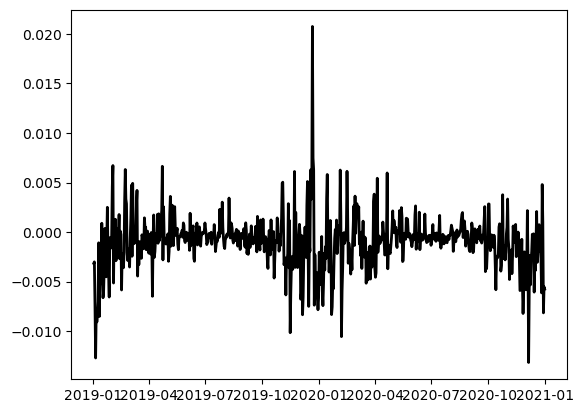

In [25]:
plt.plot(ave_speed_nc.time_instant,
         ave_speed_c - ave_speed_nc,
         color='k', linewidth=2)

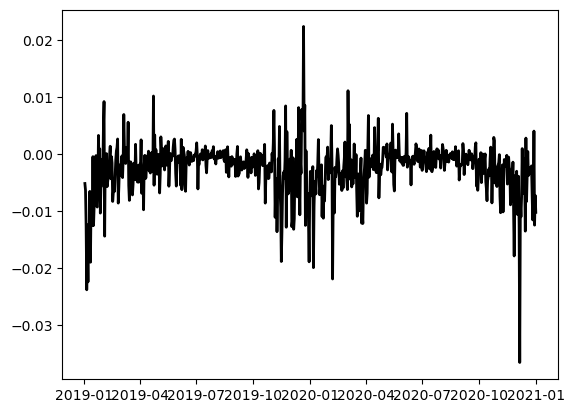

In [13]:
plt.plot(quantiles_speed_nc.time_instant,
         quantiles_speed_c.isel(quantile=3) - quantiles_speed_nc.isel(quantile=3),
         color='k', linewidth=2)

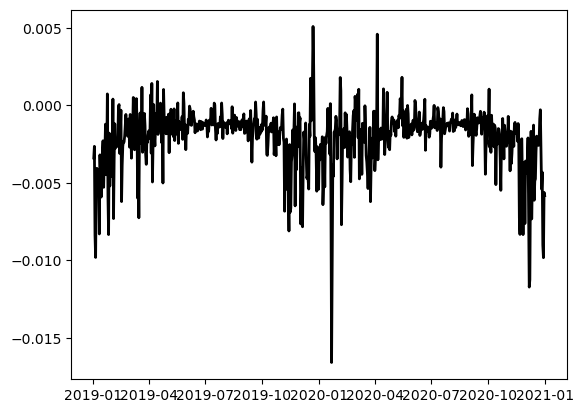

In [12]:
plt.plot(quantiles_speed_nc.time_instant,
         quantiles_speed_c.isel(quantile=2) - quantiles_speed_nc.isel(quantile=2),
         color='k', linewidth=2)

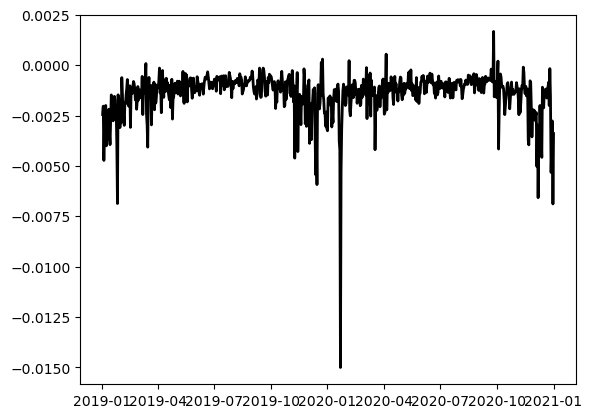

In [22]:
plt.plot(quantiles_speed_nc.time_instant,
         quantiles_speed_c.isel(quantile=1) - quantiles_speed_nc.isel(quantile=1),
         color='k', linewidth=2)

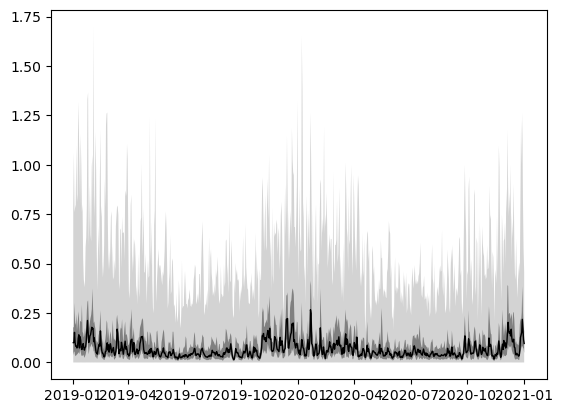

In [21]:
plt.fill_between(quantiles_speed_nc.time_instant,
                 quantiles_speed_nc.isel(quantile=0),
                 quantiles_speed_nc.isel(quantile=4),
                 facecolor='lightgrey')
plt.fill_between(quantiles_speed_nc.time_instant,
                 quantiles_speed_nc.isel(quantile=1),
                 quantiles_speed_nc.isel(quantile=3),
                 facecolor='grey')
plt.plot(quantiles_speed_nc.time_instant,
         quantiles_speed_nc.isel(quantile=2),
         color='k', linewidth=1)
